In [ ]:
##How different special qualities of Wine effect its taste scoores

In [ ]:
#import libs

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [9]:
data = pd.read_csv(url, sep=";")

In [10]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


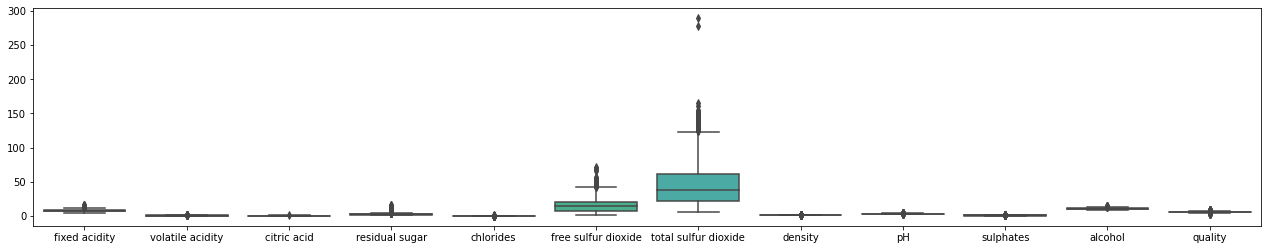

In [13]:
##visualize dataframe with boxplot
fig, ax = plt.subplots(1, figsize=(22,4))
                       
sns.boxplot(data=data)
plt.show()

In [14]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [15]:
data = data[data['total sulfur dioxide']< 200]

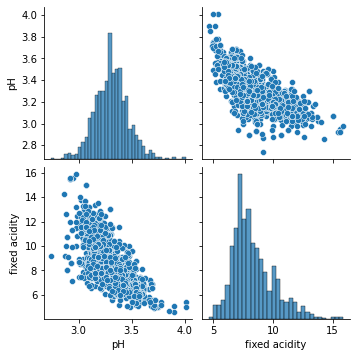

In [16]:
sns.pairplot(data[['pH', 'fixed acidity']])
plt.show()

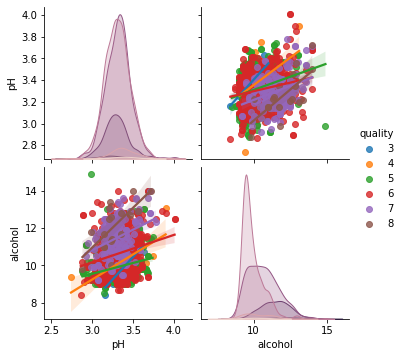

In [17]:
sns.pairplot(data[['pH', 'alcohol', 'quality']], kind = 'reg', hue='quality')
plt.show()

<AxesSubplot:xlabel='residual sugar', ylabel='alcohol'>

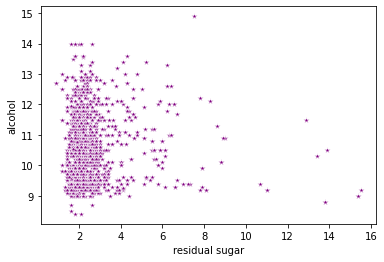

In [18]:
sns.scatterplot(x=data['residual sugar'], y=data['alcohol'], color='purple', marker='*')

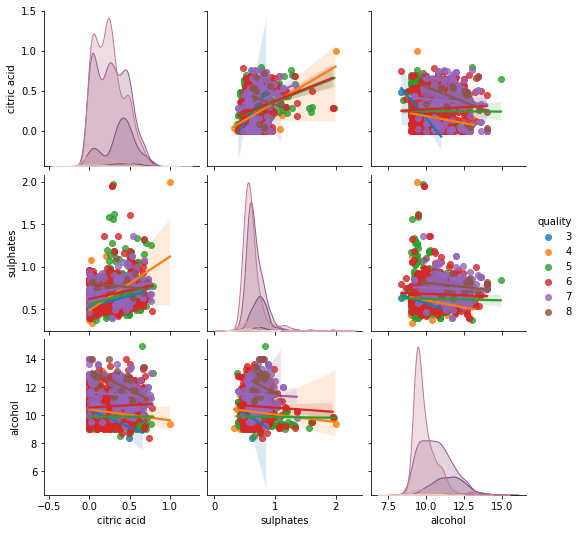

In [19]:
plotCols=['citric acid','sulphates', 'alcohol', 'quality']
sns.pairplot(data[plotCols], kind = 'reg', hue='quality')
plt.show()

In [26]:
x = data['chlorides'][data['quality']==3]
y = data['chlorides'][data['quality']==8]
x

459     0.074
517     0.200
690     0.097
832     0.145
899     0.084
1299    0.137
1374    0.267
1469    0.061
1478    0.082
1505    0.078
Name: chlorides, dtype: float64

In [27]:
## T test

Ttest = stats.ttest_ind(x,y)
Ttest

Ttest_indResult(statistic=3.4178236022263118, pvalue=0.0020887005807749223)

In [28]:
## Multiple Lineer Regression Model

import statsmodels.api as sm

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256785     0.674227   
volatile acidity          -0.256785          1.000000    -0.551231   
citric acid                0.674227         -0.551231     1.000000   
residual sugar             0.117248          0.008531     0.134610   
chlorides                  0.093505          0.060113     0.206571   
free sulfur dioxide       -0.153587         -0.007234    -0.066781   
total sulfur dioxide      -0.114809          0.091062     0.017188   
density                    0.669013          0.019059     0.371816   
pH                        -0.685227          0.232618    -0.539549   
sulphates                  0.182836         -0.262772     0.316095   
alcohol                   -0.061258         -0.200072     0.105767   
quality                    0.124790         -0.388955     0.222943   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

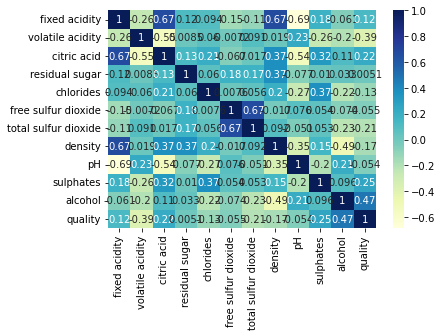

In [49]:
print(data.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [33]:
dep_var = data['quality']
ind_var = data.drop('quality', axis=1)
ind_var = sm.add_constant(ind_var)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [31]:
ind_var

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [109]:
model = sm.OLS(dep_var, ind_var).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     81.47
Date:                Fri, 13 May 2022   Prob (F-statistic):          1.30e-145
Time:                        14:25:16   Log-Likelihood:                -1564.5
No. Observations:                1597   AIC:                             3153.
Df Residuals:                    1585   BIC:                             3218.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.1410 

In [36]:
model.pvalues

const                   4.775169e-01
fixed acidity           4.345903e-01
volatile acidity        1.911829e-18
citric acid             2.093276e-01
residual sugar          4.982487e-01
chlorides               8.083472e-06
free sulfur dioxide     1.613999e-02
total sulfur dioxide    4.735725e-07
density                 6.141745e-01
pH                      2.816326e-02
sulphates               9.971615e-16
alcohol                 7.377992e-25
dtype: float64

In [45]:
print([i for i in list(model.pvalues[model.pvalues < .05].keys())])

['volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']


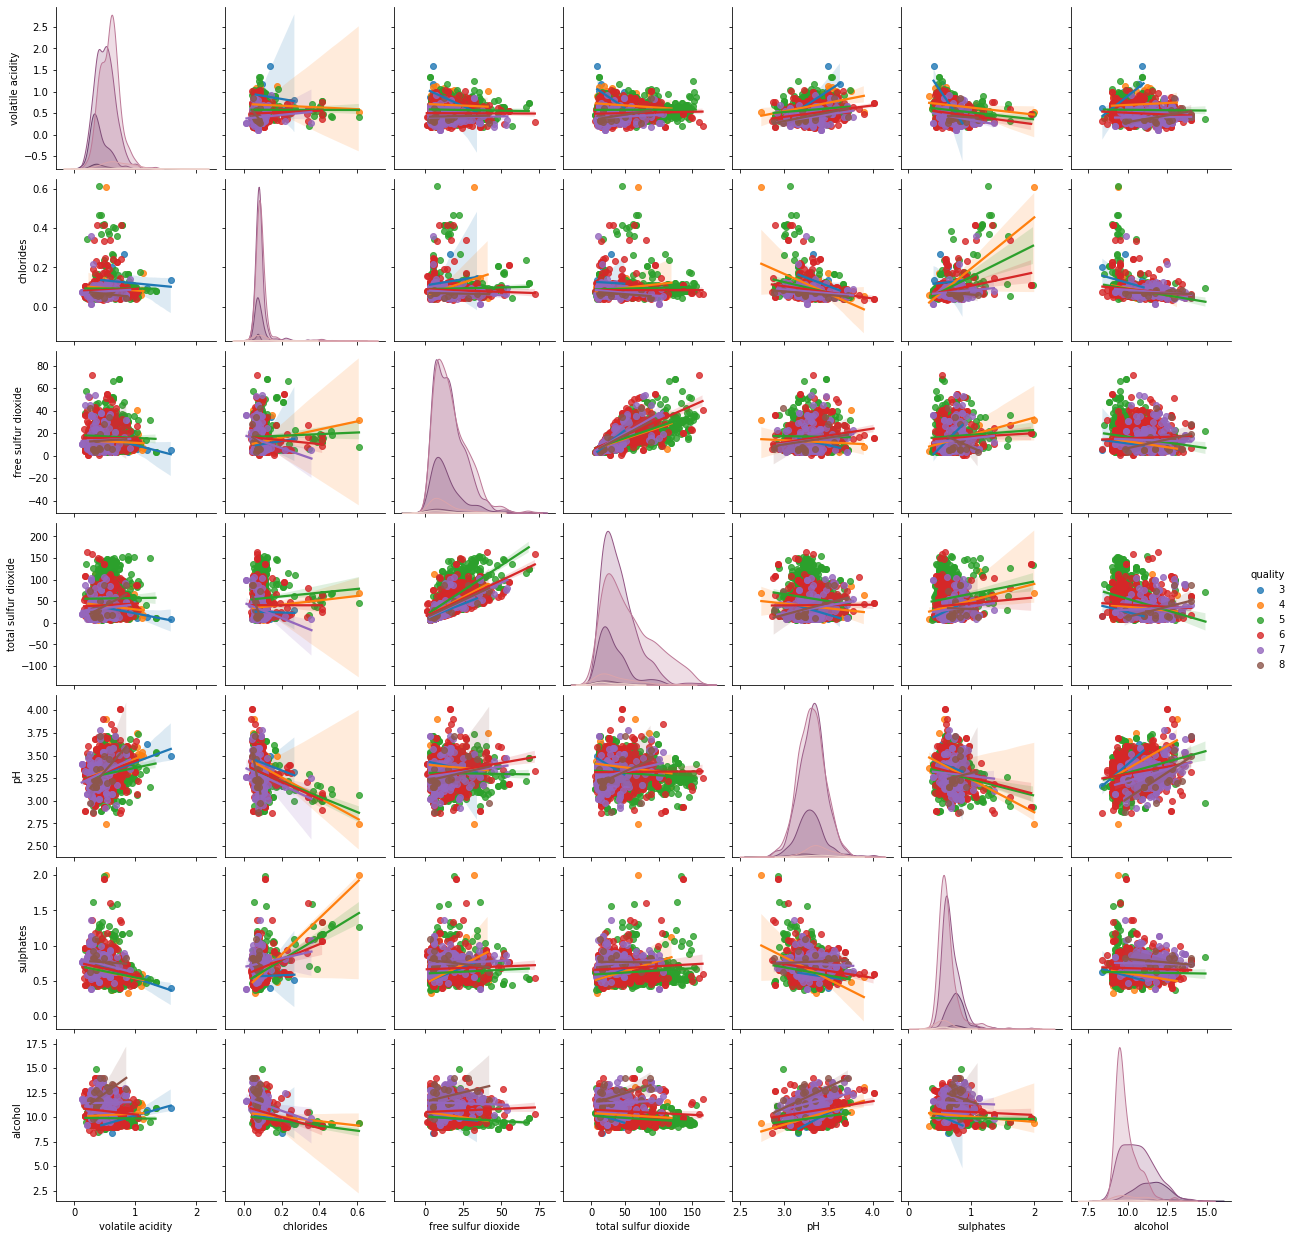

In [44]:
model_cols = [i for i in list(model.pvalues[model.pvalues < .05].keys())]
model_cols.append('quality')
sns.pairplot(data[model_cols], kind='reg', hue='quality')


In [ ]:
## Logistic Regression Model

In [ ]:
##quality thresholding

In [50]:
qualThr = data['quality'].mean()
qualThr

5.634314339386349

In [51]:
data['binaryQual'] = data['quality'] > qualThr

In [54]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'binaryQual'],
      dtype='object')

In [55]:
data['binaryQual']

0       False
1       False
2       False
3        True
4       False
        ...  
1594    False
1595     True
1596     True
1597    False
1598     True
Name: binaryQual, Length: 1597, dtype: bool

In [62]:
data2 = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [73]:
data3 = data[[col for col in data.columns if col not in ['quality', 'binaryQual']]]

In [74]:
data3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [68]:
data2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [77]:
model = sm.Logit(data['binaryQual'], data2)

results = model.fit(method='newton')
results.summary()

Optimization terminated successfully.
         Current function value: 0.516369
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             binaryQual   No. Observations:                 1597
Model:                          Logit   Df Residuals:                     1586
Method:                           MLE   Df Model:                           10
Date:                Fri, 13 May 2022   Pseudo R-squ.:                  0.2525
Time:                        12:34:58   Log-Likelihood:                -824.64
converged:                       True   LL-Null:                       -1103.2
Covariance Type:            nonrobust   LLR p-value:                2.601e-113
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.1020      0.063      1.609      0.108      -0.022       0.226
volatile acidity        -3.2749      0.485     -6.753      0.000      -4.225      -2.324
citric acid             -1.2889      0.565     -2.280      0.023      -2.397      -0.181
residual sugar           0.0292      0.044      0.671      0.502      -0.056       0.114
chlorides               -3.9542      1.564     -2.528      0.011      -7.020      -0.888
free sulfur dioxide      0.0264      0.008      3.144      0.002       0.010       0.043
total sulfur dioxide    -0.0189      0.003     -6.173      0.000      -0.025      -0.013
density                 -7.2770      2.362     -3.081      0.002     -11.907      -2.647
pH                      -0.4818      0.602     -0.800      0.424      -1.662       0.698
sulphates                2.8220      0.439      6.428      0.000       1.961       3.682
alcohol                  0.8804      0.074     11.856      0.000       0.735       1.026
========================================================================================
"""

In [80]:
resultLogit = results.pvalues[results.pvalues< .05].keys()

In [81]:
resultLogit

Index(['volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'sulphates', 'alcohol'],
      dtype='object')

In [84]:
list(resultLogit)

['volatile acidity',
 'citric acid',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol']

In [85]:
results.pvalues[results.pvalues< .05]

volatile acidity        1.451251e-11
citric acid             2.261043e-02
chlorides               1.148252e-02
free sulfur dioxide     1.664068e-03
total sulfur dioxide    6.716734e-10
density                 2.064737e-03
sulphates               1.295676e-10
alcohol                 2.002532e-32
dtype: float64

In [ ]:
### transform data

In [87]:
dataTRx = np.cumsum(data)
dataTRx

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binaryQual
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,5,0
1,15.2,1.580,0.00,4.50,0.174,36.0,101.0,1.99460,6.71,1.24,19.20,10,0
2,23.0,2.340,0.04,6.80,0.266,51.0,155.0,2.99160,9.97,1.89,29.00,15,0
3,34.2,2.620,0.60,8.70,0.341,68.0,215.0,3.98960,13.13,2.47,38.80,21,1
4,41.6,3.320,0.60,10.60,0.417,79.0,249.0,4.98740,16.64,3.03,48.20,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,13263.2,841.370,431.11,4032.85,139.479,25191.0,73558.0,1587.82980,5274.55,1048.48,16598.35,8975,850
1595,13269.1,841.920,431.21,4035.05,139.541,25230.0,73609.0,1588.82492,5278.07,1049.24,16609.55,8981,851
1596,13275.4,842.430,431.34,4037.35,139.617,25259.0,73649.0,1589.82066,5281.49,1049.99,16620.55,8987,852
1597,13281.3,843.075,431.46,4039.35,139.692,25291.0,73693.0,1590.81613,5285.06,1050.70,16630.75,8992,852


In [107]:
dataX=data.chlorides
dataY=stats.rankdata(dataX)/(stats.rankdata(dataX))**2

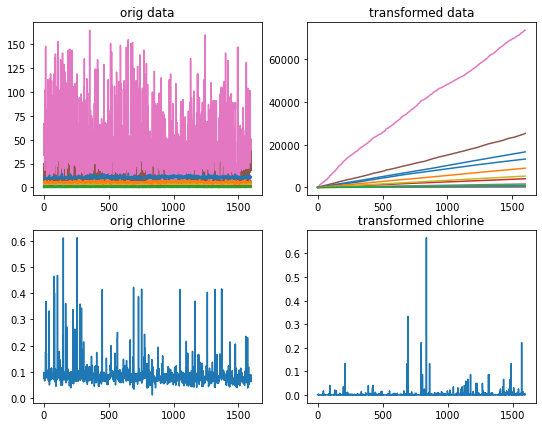

In [108]:
fig, ax = plt.subplots(2,2, figsize=(9,7))
ax[0,0].plot(data)
ax[0,0].set_title('orig data')
ax[0,1].plot(dataTRx)
ax[0,1].set_title('transformed data')
ax[1,0].plot(dataX)
ax[1,0].set_title('orig chlorine')
ax[1,1].plot(dataY)
ax[1,1].set_title('transformed chlorine')
plt.show()